# Bibliotecas


In [41]:
import pandas as pd
import json
json_normalize = pd.io.json.json_normalize
import numpy as np

In [5]:
with open("data/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico_2019_Febrero.json", "r") as read_file:
    data = json.load(read_file)

In [28]:
campos = ['fecha_hechos','fiscalia','agencia','unidad_investigacion','alcaldia_hechos',
          'colonia_hechos','geopoint','categoria_delito','delito']

In [45]:
alcaldias = ['ALVARO OBREGON','AZCAPOTZALCO', 'BENITO JUAREZ', 'COYOACAN',
             'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A MADERO',
             'IZTACALCO', 'IZTAPALAPA', 'LA MAGDALENA CONTRERAS',
             'MIGUEL HIDALGO', 'MILPA ALTA', 'TLAHUAC', 'TLALPAN',
             'VENUSTIANO CARRANZA', 'XOCHIMILCO']

In [ ]:
bajoimpacto = ['DELITO DE BAJO IMPACTO', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
               'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
               'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 
               'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA']

altoimpacto = ['HOMICIDIO DOLOSO','LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
               'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'ROBO A NEGOCIO CON VIOLENCIA',
               'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'SECUESTRO', 'VIOLACIÓN']

In [ ]:
bajoimpacto = ['DELITO DE BAJO IMPACTO', 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
               'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
               'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA', 
               'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA']

altoimpacto = ['HOMICIDIO DOLOSO','LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
               'ROBO A CASA HABITACIÓN CON VIOLENCIA', 'ROBO A NEGOCIO CON VIOLENCIA',
               'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA', 'SECUESTRO', 'VIOLACIÓN']

In [49]:
# Crear una tabla 
tabla_list = []
i = 0
for evento in data:
    fila_list = []
    for campo in campos:
        try:
            fila_list.append(evento['fields'][campo])
        except:
            fila_list.append('NA')
            i += 1
    tabla_list.append(fila_list)

# Crear un dataframe
df_crimen = pd.DataFrame(tabla_list,columns=campos)

In [57]:
lista_delitos = []
for delito in df_crimen['delito'].unique():
    lista_delitos.append([delito,len(df_crimen[df_crimen['delito'] == delito])])
df_delitos = pd.DataFrame(lista_delitos,columns = ['Delito' , 'Eventos'])

# orden por delito más frecuente
df_delitos.sort_values(by='Eventos',ascending=False,inplace=True)

# rehacer los indices
df_delitos.set_index(np.arange(len(lista_delitos))+1,inplace=True)

In [58]:
df_delitos

,Delito,Eventos
1,VIOLENCIA FAMILIAR,1774
2,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1423
3,ROBO A NEGOCIO SIN VIOLENCIA,1279
4,AMENAZAS,1043
5,ROBO DE OBJETOS,922
...,...,...
191,ROBO DE VEHICULO DE SERVICIO DE TRANSPORTE SIN...,1
192,LESIONES INTENCIONALES Y ROBO DE VEHICULO,1
193,TENTATIVA DE VIOLACION,1
194,ROBO A TRANSEUNTE Y VEHICULO CON VIOLENCIA,1


<IPython.core.display.Javascript object>


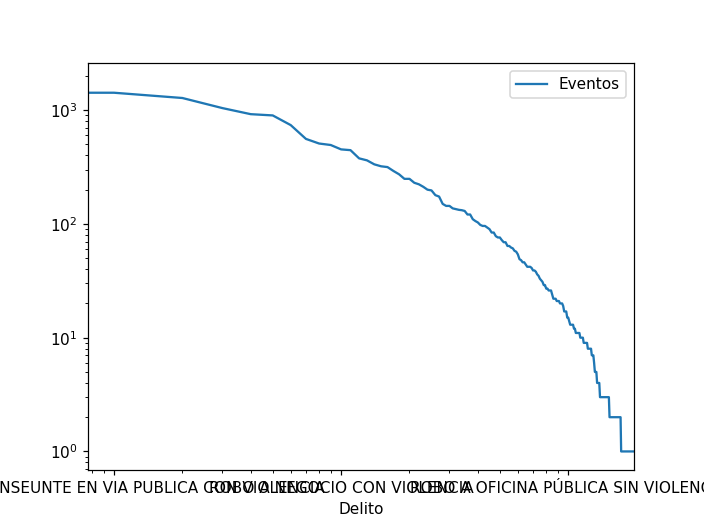

In [75]:
df_delitos.plot(x='Delito',y='Eventos',loglog=True)

In [60]:
from bokeh.plotting import figure, output_file, show

In [66]:
from bokeh.io import output_notebook

In [67]:
output_notebook()

Loading BokehJS ...

In [68]:
p = figure()

In [71]:
p.line(df_delitos.index,df_delitos.Eventos,color='blue',legend_label='line')
show(p)

In [72]:
from bokeh.layouts import gridplot

In [73]:
gridplot([plot_1, plot_2, plot_3, plot_4], ncols=2, plot_width=200, plot_height=100)

In [ ]:
https://docs.bokeh.org/en/latest/docs/gallery/iris_splom.html